In [36]:
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.callbacks import TensorBoard

from IPython.display import Image, SVG
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from time import time

In [37]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

In [38]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [39]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

Simple Autoencoder

In [49]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

Compression factor: 24.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [50]:
# visualisation of the representation

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [51]:
tb_callback = TensorBoard(log_dir='./logs/{}'.format(time()), histogram_freq=0, write_graph=True, write_images=True)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2808 - val_loss: 0.1898
Epoch 2/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1705 - val_loss: 0.1535
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1445 - val_loss: 0.1327
Epoch 4/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1268 - val_loss: 0.1193
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1165 - val_loss: 0.1113
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1095 - val_loss: 0.1054
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1045 - val_loss: 0.1012
Epoch 8/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1009 - val_loss: 0.0982
Epoch 9/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.0985 - val_loss: 0.0962
Epoch

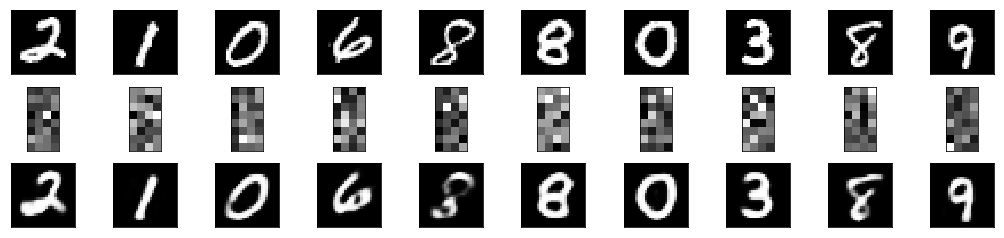

In [52]:
num_images = 10
np.random.seed(1234)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep Autoencoder

In [53]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


In [54]:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [55]:
tb_callback = TensorBoard(log_dir='./logs/{}'.format(time()), histogram_freq=0, write_graph=True, write_images=True)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test),
                callbacks=[tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2446 - val_loss: 0.1678
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1512 - val_loss: 0.1373
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1289 - val_loss: 0.1214
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1195 - val_loss: 0.1150
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1143 - val_loss: 0.1106
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1101 - val_loss: 0.1078
Epoch 7/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1072 - val_loss: 0.1047
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1050 - val_loss: 0.1029
Epoch 9/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1031 - val_loss: 0.1014
Epoch

In [56]:
history.params

{'batch_size': 256,
 'do_validation': True,
 'epochs': 50,
 'metrics': ['loss', 'val_loss'],
 'samples': 60000,
 'steps': None,
 'verbose': 1}

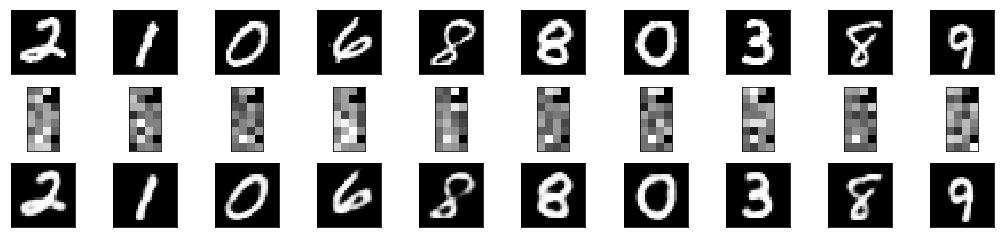

In [57]:
num_images = 10
np.random.seed(1234)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Convolutional Autoencoders

In [58]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [59]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)           0         
__________

In [60]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_1').output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
Total para

In [61]:
tb_callback = TensorBoard(log_dir='./logs/{}'.format(time()), histogram_freq=0, write_graph=True, write_images=True)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                validation_data=(x_test, x_test),
                callbacks = [tb_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 139us/step - loss: 0.2000 - val_loss: 0.1314
Epoch 2/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1230 - val_loss: 0.1155
Epoch 3/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1127 - val_loss: 0.1087
Epoch 4/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.1076 - val_loss: 0.1053.1
Epoch 5/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1041 - val_loss: 0.1017
Epoch 6/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1015 - val_loss: 0.0992
Epoch 7/100
60000/60000 [==============================] - 6s 108us/step - loss: 0.0995 - val_loss: 0.0976
Epoch 8/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.0980 - val_loss: 0.0962
Epoch 9/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.0968 - val_l

60000/60000 [==============================] - 6s 98us/step - loss: 0.0813 - val_loss: 0.0802
Epoch 78/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0812 - val_loss: 0.0805
Epoch 79/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0811 - val_loss: 0.0803
Epoch 80/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.0811 - val_loss: 0.0800
Epoch 81/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0811 - val_loss: 0.0803
Epoch 82/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0810 - val_loss: 0.0800
Epoch 83/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.0810 - val_loss: 0.0800
Epoch 84/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.0809 - val_loss: 0.0800
Epoch 85/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0810 - val_loss: 0.0800
Epoch 86/100
60000/60000 [======================

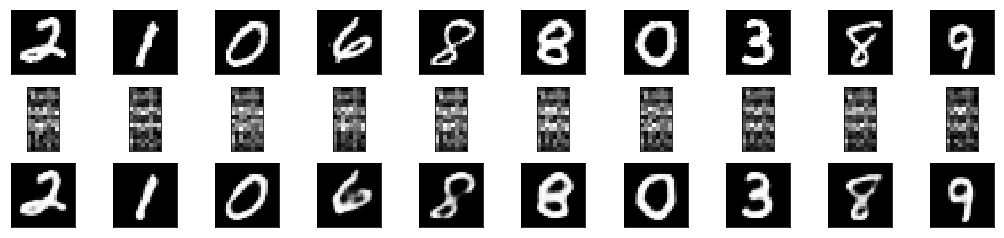

In [62]:
num_images = 10
np.random.seed(1234)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()